In [158]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
datasetlink = "https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data"
od.download(datasetlink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kidkeozz
Your Kaggle Key: ··········


100%|██████████| 5.21k/5.21k [00:00<00:00, 6.40MB/s]

In [160]:
os.chdir("unsupervised-learning-on-country-data")
os.listdir()

['data-dictionary.csv', 'Country-data.csv']

In [161]:
archivo = 'Country-data.csv'
df = pd.read_csv(archivo)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [162]:
df.shape

(167, 10)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [164]:
df['country'].value_counts().sum()

167

In [165]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [166]:
df_num = df.select_dtypes(include=['number'])
df_cat = df.select_dtypes(include=['object'])

#Matriz de correlación
Gracias a esta matriz de correlación podemos empezar a notar algunos patrones o características que se correlacionan, como por ejemplo la expectativa de vida tiene correlación alta con el ingreso y a su vez con el GDPP que es el PIB que es algo que tiene que ver bastante con los ingresos de una persona, entre otras muchas más que iremos analizando.

<Axes: >

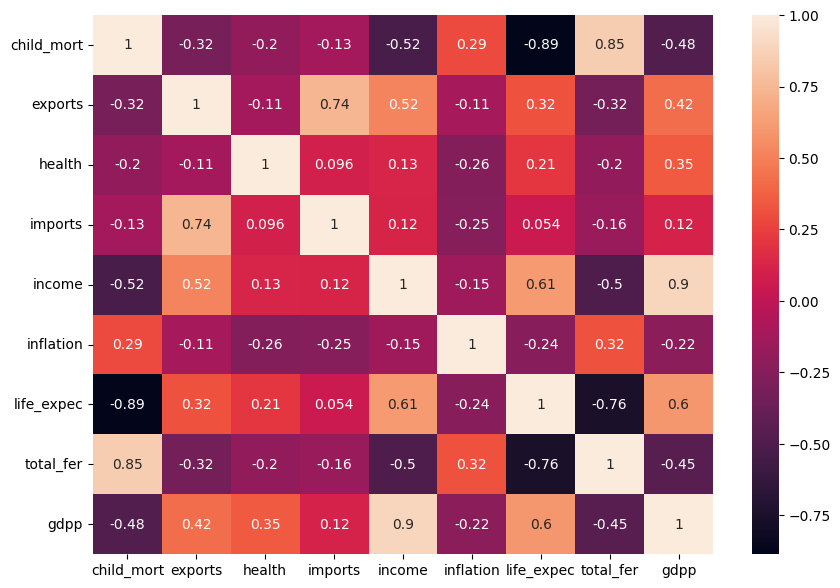

In [167]:
plt.figure(figsize=(10,7))
matrix = df_num.corr()
sns.heatmap(matrix, annot = True)

#Comparación entre la Fecundidad Materna y la Mortalidad Infantil
Podemos ver que hay una relación en cuanto a los bebes que podria tener una madre y la mortalidad infantil, esto se puede deber a muchas causas, pero como casi siempre la principal es el dinero, ya que en paises donde el ingreso no es muy alto es dificil mantener a varios niños, pero sin embargo la que encuentro como la causa más razonable puede ser la falta de educación sexual.

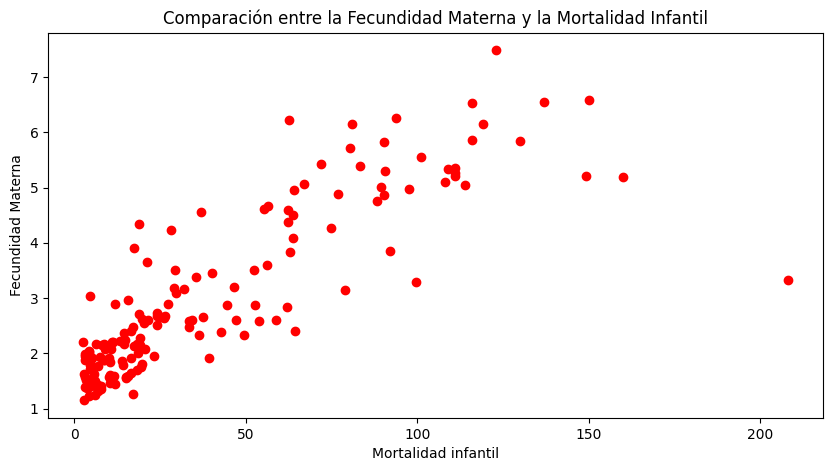

In [168]:
plt.figure(figsize=(10,5))
plt.scatter(df['child_mort'], df['total_fer'], color= 'red')
plt.title('Comparación entre la Fecundidad Materna y la Mortalidad Infantil')
plt.xlabel('Mortalidad infantil')
plt.ylabel('Fecundidad Materna')
plt.show()

In [169]:
#paises con mayor mortalidad infantil
df.sort_values(by='child_mort', ascending=False)[['country', 'child_mort', 'health']].head(10)

,country,child_mort,health
66,Haiti,208.0,6.91
132,Sierra Leone,160.0,13.10
32,Chad,150.0,4.53
31,Central African Republic,149.0,3.98
97,Mali,137.0,4.98
113,Nigeria,130.0,5.07
112,Niger,123.0,5.16
3,Angola,119.0,2.85
25,Burkina Faso,116.0,6.74
37,"Congo, Dem. Rep.",116.0,7.91


In [170]:
#paises con mas fecundidad materna
df.sort_values(by='total_fer', ascending=False)[['country','total_fer', 'health']].head(10)

,country,total_fer,health
112,Niger,7.49,5.16
32,Chad,6.59,4.53
97,Mali,6.55,4.98
37,"Congo, Dem. Rep.",6.54,7.91
26,Burundi,6.26,11.60
149,Timor-Leste,6.23,9.12
3,Angola,6.16,2.85
155,Uganda,6.15,9.01
25,Burkina Faso,5.87,6.74
113,Nigeria,5.84,5.07


In [171]:
#paises con mayor inflacion
df.sort_values(by='inflation', ascending=False)[['country', 'inflation', 'gdpp']].head(10)

,country,inflation,gdpp
113,Nigeria,104.0,2330
163,Venezuela,45.9,13500
103,Mongolia,39.2,2650
149,Timor-Leste,26.5,3600
49,Equatorial Guinea,24.9,17100
165,Yemen,23.6,1310
140,Sri Lanka,22.8,2810
3,Angola,22.4,3530
5,Argentina,20.9,10300
37,"Congo, Dem. Rep.",20.8,334


#Comparación entre las exportaciones y las importaciones
esta comparación la realice debido a que mostraba una correlación anteriormente y puede deberse a muchas cosas, sin embargo la que encuentro más viable es que la mayoria de paises mantienen un equilibrio entre las exportaciones y las exportaciones que realizan.

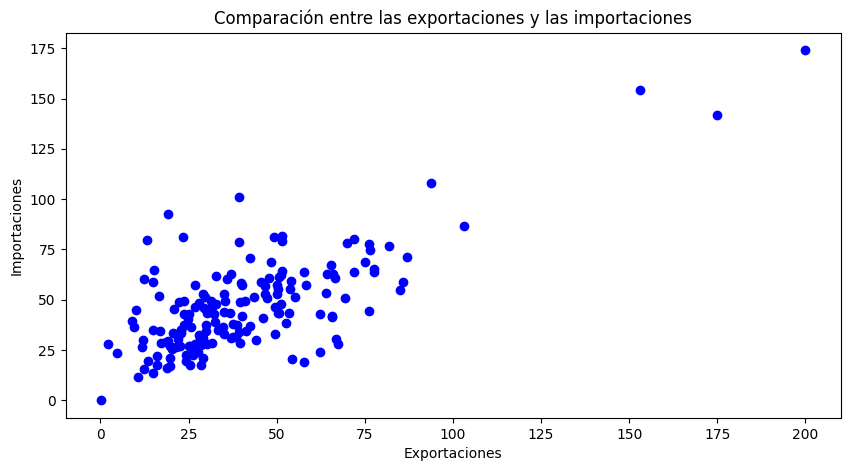

In [172]:
plt.figure(figsize=(10,5))
plt.scatter(df['exports'], df['imports'], color='blue')
plt.title('Comparación entre las exportaciones y las importaciones')
plt.xlabel('Exportaciones')
plt.ylabel('Importaciones')
plt.show()

In [173]:
#paises con las mayores importaciones
df.sort_values(by='imports', ascending=False)[['country', 'imports','exports', 'income', 'gdpp']].head(10)

,country,imports,exports,income,gdpp
133,Singapore,174.0,200.0,72100,46600
98,Malta,154.0,153.0,28300,21100
91,Luxembourg,142.0,175.0,91700,105000
131,Seychelles,108.0,93.8,20400,10800
87,Lesotho,101.0,39.4,2380,1170
88,Liberia,92.6,19.1,700,327
73,Ireland,86.5,103.0,45700,48700
83,Kyrgyz Republic,81.7,51.6,2790,880
136,Solomon Islands,81.2,49.3,1780,1290
101,"Micronesia, Fed. Sts.",81.0,23.5,3340,2860


In [174]:
#paises con las mayores exportaciones
df.sort_values(by='exports', ascending=False)[['country', 'imports','exports', 'income', 'gdpp']].head(10)

,country,imports,exports,income,gdpp
133,Singapore,174.0,200.0,72100,46600
91,Luxembourg,142.0,175.0,91700,105000
98,Malta,154.0,153.0,28300,21100
73,Ireland,86.5,103.0,45700,48700
131,Seychelles,108.0,93.8,20400,10800
95,Malaysia,71.0,86.9,21100,9070
49,Equatorial Guinea,58.9,85.8,33700,17100
38,"Congo, Rep.",54.7,85.1,5190,2740
67,Hungary,76.5,81.8,22300,13100
157,United Arab Emirates,63.6,77.7,57600,35000


#Relación entre los ingresos y la expectativa de vida
Como podemos ver tenemos que cuando los ingresos tienden a aumentar, la expectativa de vida tambien desde cierto punto lo hace ademas de que en la grafica notamos tristemente que existe un pais con una expectativa de vida bastante baja, ademas notamos que hay paises donde la expectativa de vida es alta y sus ingresos no lo son tanto, pero notamos que en cuanto la expectativa de vida tiende a llegar a los 75 los ingresos se empiezan a disparar.

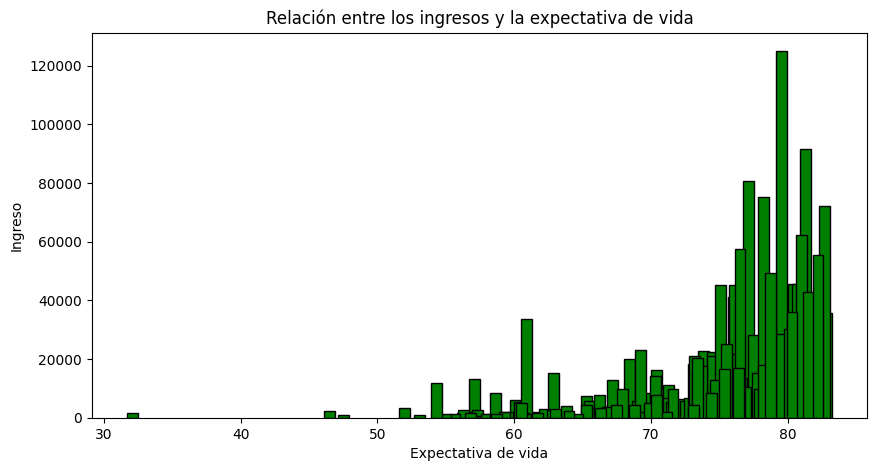

In [175]:
plt.figure(figsize=(10,5))
plt.bar(df['life_expec'],df['income'], color = 'Green',edgecolor='black')
plt.title('Relación entre los ingresos y la expectativa de vida')
plt.xlabel('Expectativa de vida')
plt.ylabel('Ingreso')
plt.show()

In [176]:
#paises con expectativa de vida mas baja
df.sort_values(by='life_expec').head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459


In [177]:
#paises con los menores ingresos#
df.sort_values(by='income').head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446


In [178]:
#paises con expectativa de vida mas alta
df.sort_values(by='life_expec', ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900


In [179]:
#paises con mayores ingresos
df.sort_values(by='income', ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [180]:
#paises con mayor gdpp
df.sort_values(by='gdpp', ascending=False).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000


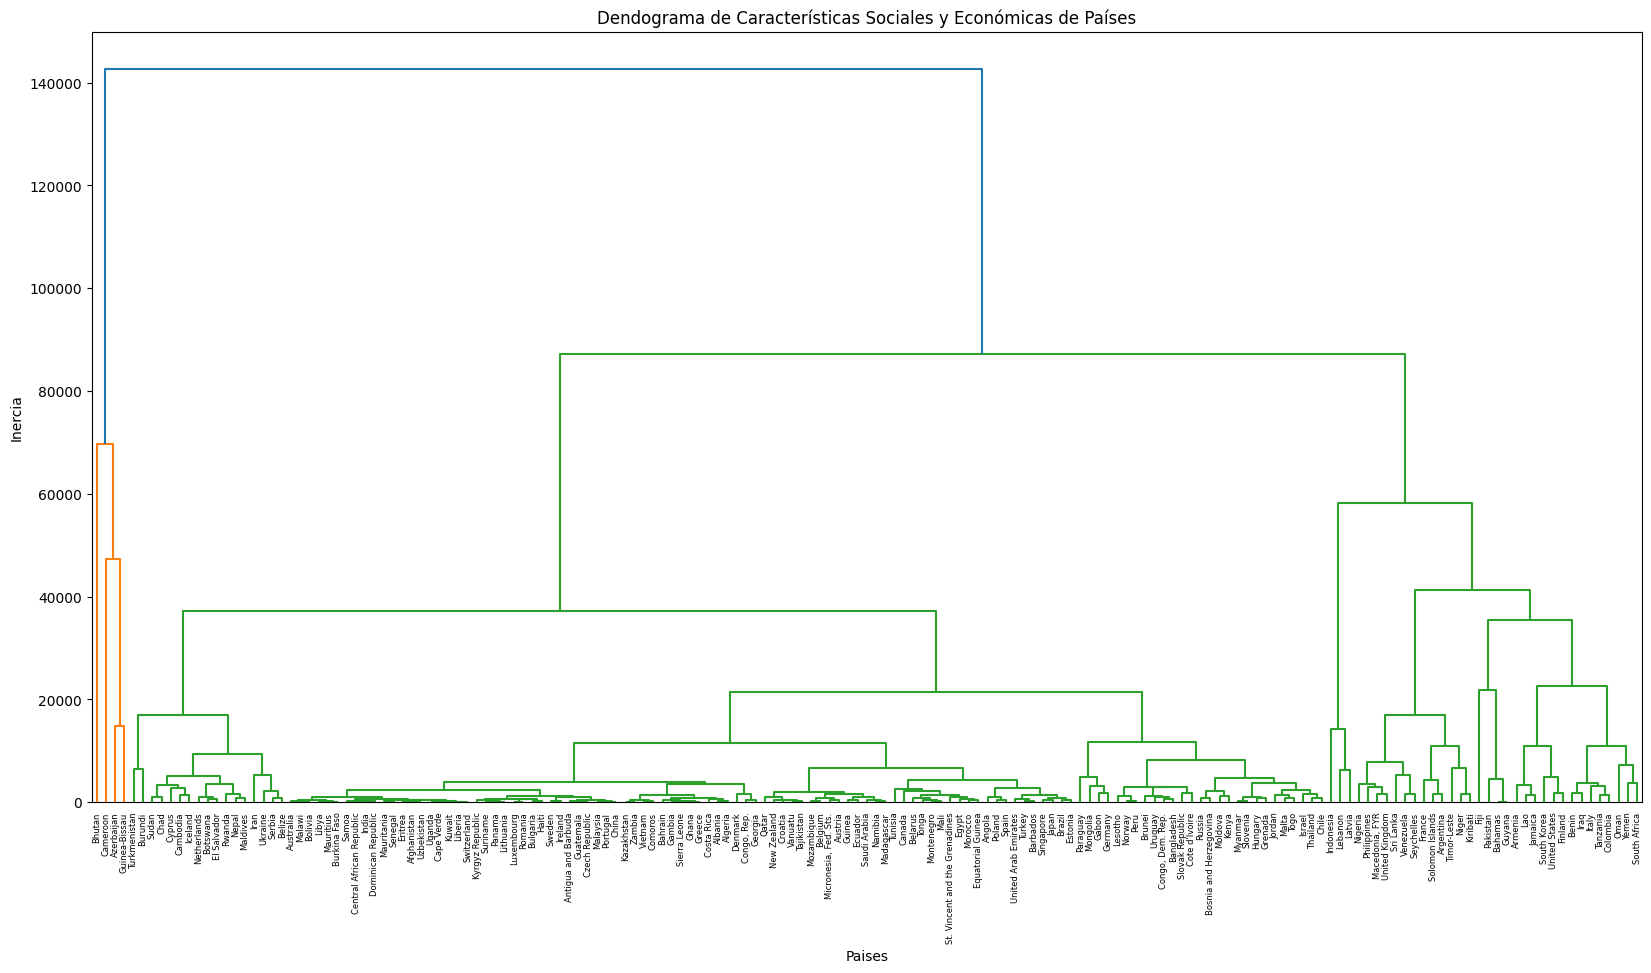

In [181]:
from scipy.cluster.hierarchy import linkage, dendrogram
label = df['country'].value_counts().keys()
plt.figure(figsize=(20,10))
mergings = linkage(df_num, method='complete')
dendrogram(mergings,
           labels= label ,
           leaf_rotation=90,
           leaf_font_size=6
)
plt.title('Dendograma de Características Sociales y Económicas de Países')
plt.xlabel('Paises')
plt.ylabel('Inercia')
plt.show()

In [182]:
from sklearn.cluster import KMeans
inertia = []

ks = range(1,10)

for k in ks:
  model = KMeans(n_clusters=k)
  model.fit(df_num)
  inertia.append(model.inertia_)
print(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[117459687469.07816, 36528387934.322105, 21710210039.754135, 14610713446.53513, 10656995706.226364, 7657342711.458323, 5353767457.732323, 4258897193.751583, 3230323508.273777]


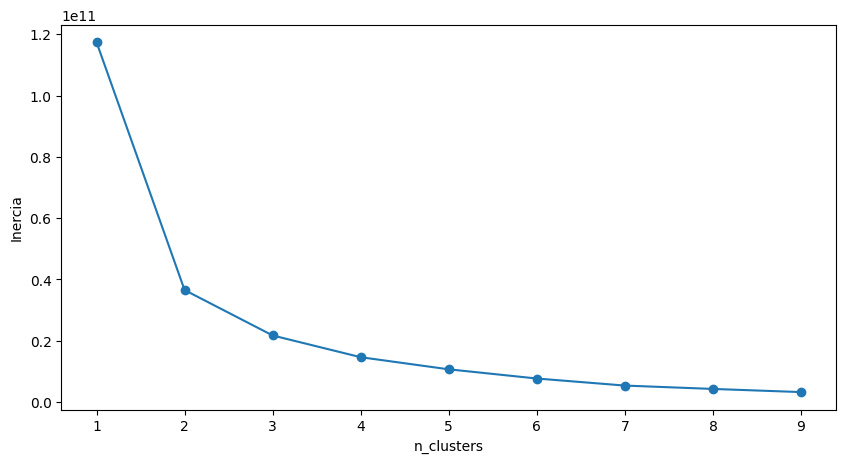

In [183]:
plt.figure(figsize=(10,5))
plt.plot(ks, inertia, '-o')
plt.ylabel('Inercia')
plt.xlabel('n_clusters')
plt.xticks(ks)
plt.show()

In [184]:
  model = KMeans(n_clusters=3)
  model.fit(df_num)
  clusters = model.predict(df_num)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
